# Data Plotting


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
plt.ion()
# Loads nicard and scope
manager.startModule('logic','cavitylogic')
import glob

In [3]:
filenames = glob.glob('./*.dat')
print(filenames)


fileNum=3
cavitylogic._load_full_sweep(filepath='', filename=filenames[fileNum])
cavitylogic._trim_data()
print(filenames[fileNum])

['.\\2017-08-15_144400_full_sweep_data_calibrationOfStage.dat', '.\\2017-08-15_150436_full_sweep_data_calibration2.dat', '.\\2017-08-15_151042_full_sweep_data.dat', '.\\2017-08-15_151505_full_sweep_data.dat', '.\\2017-08-15_151553_full_sweep_data.dat', '.\\2017-08-15_151659_full_sweep_data.dat']
.\2017-08-15_151505_full_sweep_data.dat


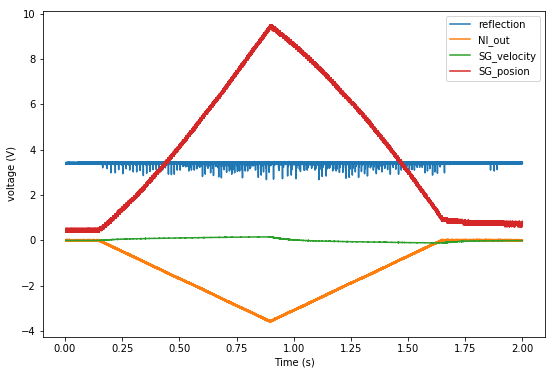

In [4]:
labels = ['reflection', 'NI_out', 'SG_velocity', 'SG_posion']
for i in range(4):
            plt.plot(cavitylogic.time,cavitylogic.volts[i], label = labels[i])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('voltage (V)')
plt.show()

Max and min are 71.10000000000001, 2.6999999999999997 um
time 1.5


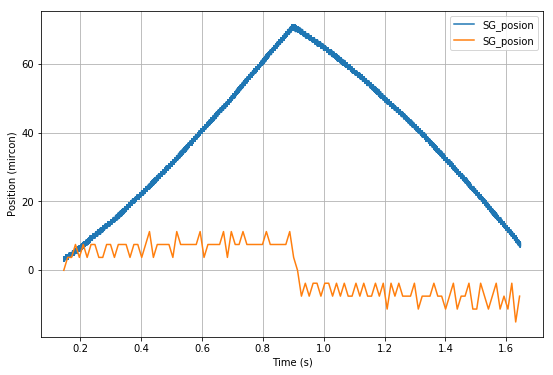

In [5]:
i =3
pos=cavitylogic.volts_trim[i]/10*75
dt = cavitylogic.time_trim[10]-cavitylogic.time_trim[0]
dxdt= np.diff(pos[::8000])/dt
dxdt= np.hstack([np.array([0]),dxdt])/10000
plt.plot(cavitylogic.time_trim,pos, label = labels[i])
plt.plot(cavitylogic.time_trim[::8000],dxdt, label = labels[i])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (mircon)')
plt.grid('on')
plt.show()
print('Max and min are {}, {} um'.format(pos.max(), pos.min()))
print('time {}'.format(cavitylogic.time_trim[-1]-cavitylogic.time_trim[0]))

Max and min are 71.10000000000001, 2.6999999999999997 um
time 1.4975408000000001


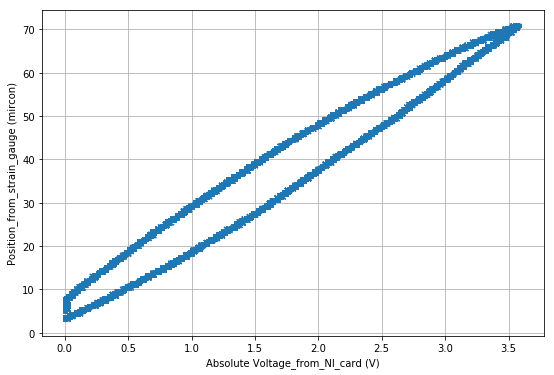

In [2]:
plt.plot(abs(cavitylogic.volts[1]),cavitylogic.volts[3]*75/10)

plt.legend()
plt.xlabel('Absolute Voltage_from_NI_card (V)')
plt.ylabel('Position_from_strain_gauge (mircon)')
plt.grid('on')
plt.show()
print('Max and min are {}, {} um'.format(pos.max(), pos.min()))
print('time {}'.format(cavitylogic.time_trim[-1]-cavitylogic.time_trim[0]))